In [1]:
######################################### Import all the required libraries ###################################################
# Import libraries for df manipulation and statistics
import numpy as np
import pandas as pd
from scipy import stats

# Import libraries for df visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Import libraries for feature engineering and machine learning
import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn import metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Import other relevant libraries
import datetime
from datetime import date

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

# Display all the columns in the pandas dfframe
pd.set_option("display.max_columns",None)

## Loading and Exploring Data

In [2]:
df = pd.read_csv('../data/raw/marketing_campaign.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [5]:
# Check if there are any missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Display the rows with missing values
df[df.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [7]:
# Check if there are any duplciates
df.duplicated().sum()

0

## Data Cleaning and Feature Engineering

### Remove redundant columns

In [8]:
df[['Z_CostContact','Z_Revenue']].nunique()

Z_CostContact    1
Z_Revenue        1
dtype: int64

In [9]:
# Remove the two columns with 1 unique value
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

### Convert the data type of Dt_Customer to DateTime

In [10]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

### Calculate the Tenure (Days as Customer) of each customer 

In [11]:
newest_date = df['Dt_Customer'].max()
newest_customers = df[df['Dt_Customer'] == newest_date]
newest_customers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
200,7300,1952,Graduation,Divorced,69142.0,0,1,2014-06-29,50,448,4,34,6,4,39,3,8,1,7,5,0,1,0,0,0,0,0
989,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0


<br> The newest customers' maximum Recency is 50 days from their last purchase date. Let's assume that __NOW date (anchor_date = '2014-08-29')__ is 2 months (61 days) after their Dt_Customer date. 

In [12]:
anchor_date = newest_date + pd.DateOffset(days=61)
print (anchor_date)

2014-08-29 00:00:00


In [13]:
df['Tenure'] = (anchor_date - df['Dt_Customer']).dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,724
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,174
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,373
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,200
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,222


### Clean the invalid Age

In [14]:
# Calculate the Age of each customer from the Year_Birth and anchor_date
df['Age'] = 2014 - df['Year_Birth']

# Check if there are any invalid Age
df.query('Age > 100')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,337,114
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,104,121
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,337,115


In [15]:
# Remove the rows with invalid Age
df = df[df.Age < 100]

### Handling outliers and missing values of Income

In [16]:
# Make a function to calculate Z-Score for outlier detection
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(df
 .assign(Z_Score=calc_z(df, col='Income'))
 .query('Z_Score.abs() >= 3')
)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure,Age,Z_Score
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,181,41,4.170462
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,452,38,4.375160
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,203,39,4.038644
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,755,32,4.311852
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,451,43,4.189923
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,487,37,4.166610
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,365,65,4.157793
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,453,37,24.402840


Text(0.5, 1.0, 'Distrbution of Income')

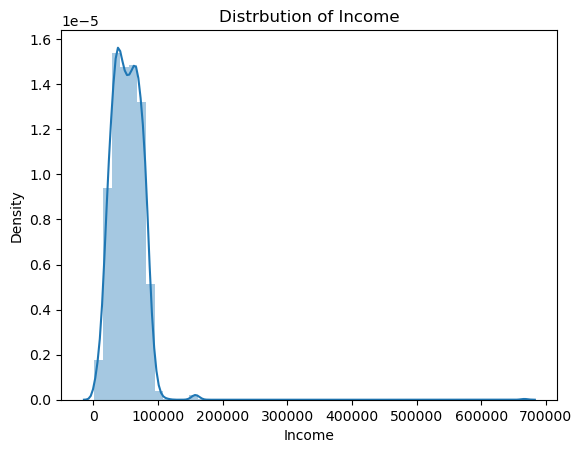

In [17]:
# Plot the distribution of Income
sns.distplot(df.Income)
plt.title('Distrbution of Income')

In [18]:
# Remove the extreme outlier (666666) to avoid skewness that could distort our analysis. 
df = df [df['Income']<600_000]

In [19]:
# Since missing values only account for about 1% of the data, remove null values. 
df = df.dropna(subset = ['Income'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-null   i

Text(0.5, 1.0, 'Distrbution of Cleaned Income')

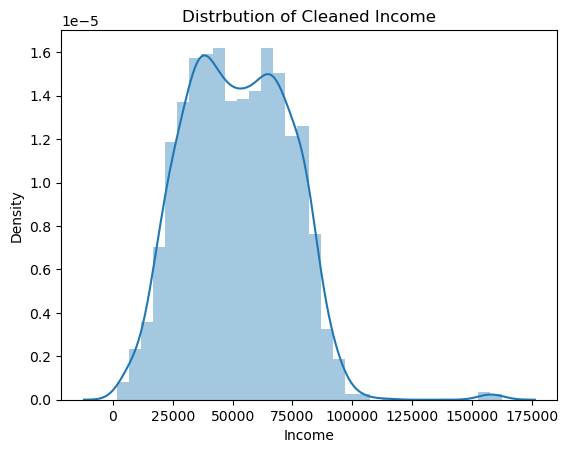

In [20]:
sns.distplot(df.Income)
plt.title('Distrbution of Cleaned Income')

### Segmenting Marital_Status and Education

In [21]:
# Remove all the leading and trailing spaces in columns names
df.columns = df.columns.str.strip()

In [22]:
# Segment 'Marital_Status' into two groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Has_Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd','Single'], 'Alone')


In [23]:
# Segment 'Education' into three groups
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

### Feature Engineering

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure,Age
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,724,57
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,174,60
2,4141,1965,Graduate,Has_Partner,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,373,49
3,6182,1984,Graduate,Has_Partner,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,200,30
4,5324,1981,Postgraduate,Has_Partner,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,222,33


In [25]:
# Total spendings on all the products
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Total number of purchases on all the products
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total accepted compaign offers
df['AcceptedCmps'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# Total children living in the household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Rename columns for clarity
df = df.rename(
    columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

# Create a feature "Has_Child" to indicate parenthood status
df['Has_Child'] = np.where(df.Children > 0, 'Has_Child', 'No_Child')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   Wines                2212 non-null   int64         
 10  Fruits               2212 non-null   int64         
 11  Meat                 2212 non-null   int64         
 12  Fish                 2212 non-null   int64         
 13  Sweets               2212 non-null   i

In [27]:
cols_to_drop = ['Dt_Customer', 'Year_Birth']
df = df.drop(columns = cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2212 non-null   int64  
 5   Teenhome             2212 non-null   int64  
 6   Recency              2212 non-null   int64  
 7   Wines                2212 non-null   int64  
 8   Fruits               2212 non-null   int64  
 9   Meat                 2212 non-null   int64  
 10  Fish                 2212 non-null   int64  
 11  Sweets               2212 non-null   int64  
 12  Gold                 2212 non-null   int64  
 13  NumDealsPurchases    2212 non-null   int64  
 14  NumWebPurchases      2212 non-null   int64  
 15  NumCatalogPurchases  2212 non-null   int64 

## Exploratory Data Analysis and Data Visualization

### Subsetting Data

In [28]:
all_cols = df.columns.to_list()

In [29]:
print (all_cols)

['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Tenure', 'Age', 'Spending', 'TotalNumPurchases', 'AcceptedCmps', 'Children', 'Has_Child']


In [30]:
# Analyze the correlations among the three spending features
df[['Spending', 'TotalNumPurchases','Recency',]].corr(method='spearman').style .background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,Spending,TotalNumPurchases,Recency
Spending,1.000000,0.865411,0.018907
TotalNumPurchases,0.865411,1.000000,0.011064
Recency,0.018907,0.011064,1.000000


In [31]:
# TotalNumPurchases and Spending are strongly correlated. To simplify the clustering analysis, we choose only one key feature, i.e. Spending.  
selected_cols1 = ['Income', 'Spending', 'Recency','Education', 'Marital_Status', 'Children', 'Age', 'Tenure', 'AcceptedCmps', 'NumWebVisitsMonth', 'Complain']

In [32]:
df1 = df[selected_cols1]

### Exploring the distribution of features

Text(0.5, 1.0, 'Distrbution of Spending')

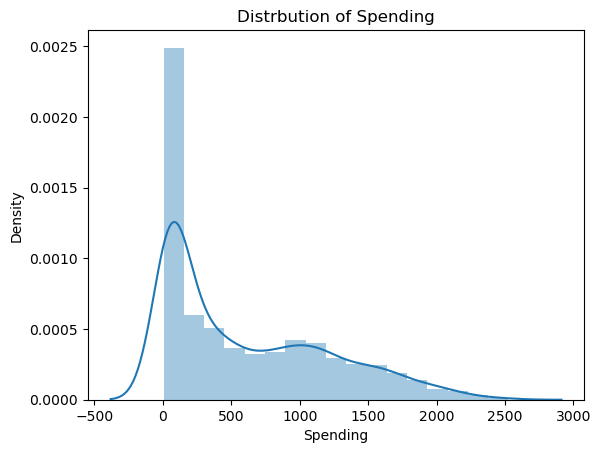

In [33]:
sns.distplot(df.Spending)
plt.title('Distrbution of Spending')

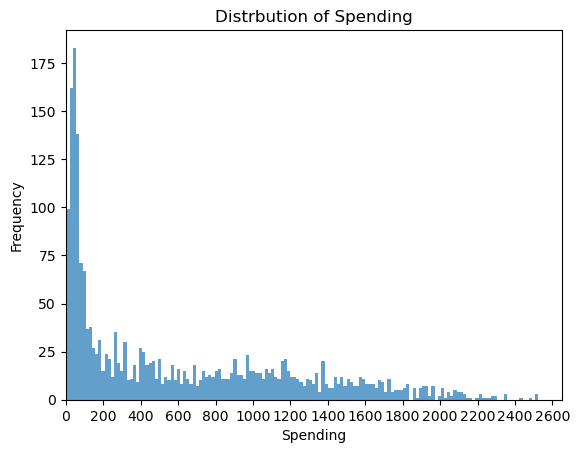

In [34]:
# Eavluate the distribution of Spending using histogram
plt.hist(df.Spending, bins=150,alpha = 0.7)
plt.xlabel('Spending')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.xticks(ticks=range(0, 2601, 200))  # Set x-axis ticks with interval of 200
plt.xlim(left=0)  # Set the minimum x-axis limit to 0
plt.title('Distrbution of Spending')
plt.show()

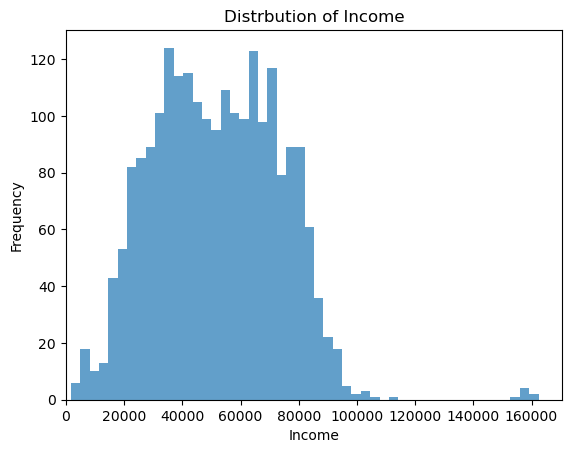

In [35]:
# Eavluate the distribution of Income using histogram
plt.hist(df.Income, bins=50,alpha=0.7)
plt.xlabel('Income')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.xticks(ticks=range(0, 170000, 20000))  # Set x-axis ticks with interval of 20000
plt.xlim(left=0)  # Set the minimum x-axis limit to 0
plt.title('Distrbution of Income')
plt.show()

### Correlation Analysis and Visualization

In [36]:
# Income and spending are continous numerical variables, but not normally distributed.
# Some features like Children and AcceptedCmps are multinomial categorical variables (ordinal variables), Age and Tenure are discrete variables.
# Therefore, we choose spearman correlation method.

(df1
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Income,Spending,Recency,Children,Age,Tenure,AcceptedCmps,NumWebVisitsMonth,Complain
Income,1.000000,0.853119,0.009791,-0.375782,0.217604,-0.022710,0.311486,-0.643981,-0.027779
Spending,0.853119,1.000000,0.018907,-0.483948,0.159741,0.183186,0.385088,-0.476092,-0.037177
Recency,0.009791,0.018907,1.000000,0.012487,0.016514,0.025866,-0.104476,-0.019027,0.005786
Children,-0.375782,-0.483948,0.012487,1.000000,0.085111,-0.023099,-0.240189,0.430880,0.030610
Age,0.217604,0.159741,0.016514,0.085111,1.000000,-0.013528,0.022275,-0.132433,0.000890
Tenure,-0.022710,0.183186,0.025866,-0.023099,-0.013528,1.000000,0.085236,0.304545,0.036186
AcceptedCmps,0.311486,0.385088,-0.104476,-0.240189,0.022275,0.085236,1.000000,-0.074742,-0.023673
NumWebVisitsMonth,-0.643981,-0.476092,-0.019027,0.430880,-0.132433,0.304545,-0.074742,1.000000,0.026497
Complain,-0.027779,-0.037177,0.005786,0.030610,0.000890,0.036186,-0.023673,0.026497,1.000000


## Clustering Analysis

### KMeans Clustering

### Elbow Method to determine the optimal number of clusters

In [37]:
# Subsetting data
# Select the three most important numerical features for clustering analysis
df_temp = df[['Income', 'Spending', 'Children']]

In [38]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_temp)
scaled_df = pd.DataFrame(scaled_df, columns=df_temp.columns)

In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Set to display 3 decimal places

scaled_df.head()

,Income,Spending,Children
0,0.287,1.676,-1.265
1,-0.261,-0.963,1.405
2,0.913,0.280,-1.265
3,-1.176,-0.920,0.070
4,0.294,-0.308,0.070


### Elbow Plot for KMeans Clustering

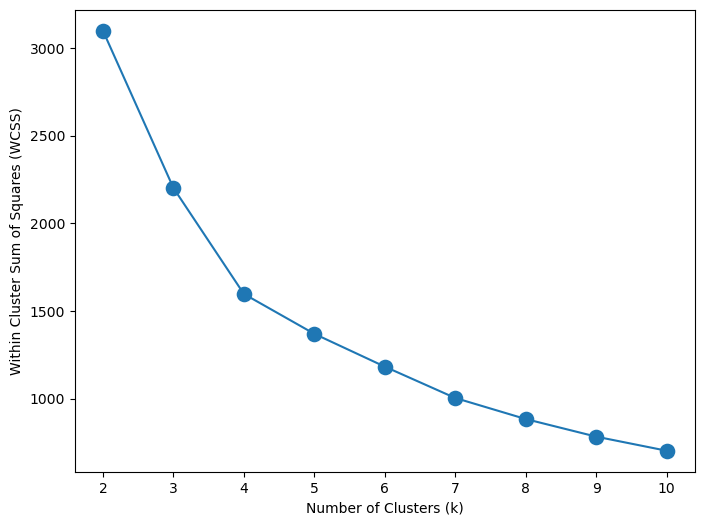

In [40]:
# Set up a random_state (5) to get consistent result
# Create the elbow plot
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 5)
    km.fit(scaled_df)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

The elbow plot indicates that __the optimal number of clusters is 4__. 

#### Perform K-means clustering

In [41]:
clusters = KMeans(n_clusters=4, random_state=5).fit(scaled_df)

In [42]:
scaled_df['Cluster'] = clusters.labels_
scaled_df

,Income,Spending,Children,Cluster
0,0.287,1.676,-1.265,0
1,-0.261,-0.963,1.405,3
2,0.913,0.280,-1.265,0
3,-1.176,-0.920,0.070,1
4,0.294,-0.308,0.070,2
...,...,...,...,...
2207,0.430,1.218,0.070,2
2208,0.560,-0.271,2.739,3
2209,0.233,1.052,-1.265,0
2210,0.803,0.391,0.070,2


In [43]:
df_temp['Cluster'] = clusters.labels_
df_temp = df_temp.replace({0:'Stars', 1:'Leaky bucket', 2:'High potential', 3:'Need attention'})
df = df.merge(df_temp.Cluster, left_index=True, right_index=True)
pd.options.display.float_format = "{:.0f}".format
summary = df[['Income','Spending','Children','Cluster']]
summary.set_index("Cluster", inplace = True)
summary = summary.groupby('Cluster').describe().transpose()
# summary=summary.groupby('Cluster').describe()
summary

Cluster         High potential  Leaky bucket  Need attention  Stars
Income   count             511           773             428    500
         mean            63725         32829           42168  77889
         std              9583         11514           12086  12838
         min             42564          1730            4023  44802
         25%             57478         24072           34787  70612
         50%             62845         33051           42308  77766
         75%             69139         41769           50743  82632
         max            162397         59892           75283 160803
Spending count             511           773             428    500
         mean              859           144             177   1435
         std               336           156             202    423
         min               107             5               8      6
         25%               600            43              43   1129
         50%               860            76              80   1428
         75%              1087           199             261   1725
         max              1750          1730            1314   2525
Children count             511           773             428    500
         mean                1             1               2      0
         std                 0             0               0      0
         min                 0             0               2      0
         25%                 1             1               2      0
         50%                 1             1               2      0
         75%                 1             1               2      0
         max                 3             1               3      1

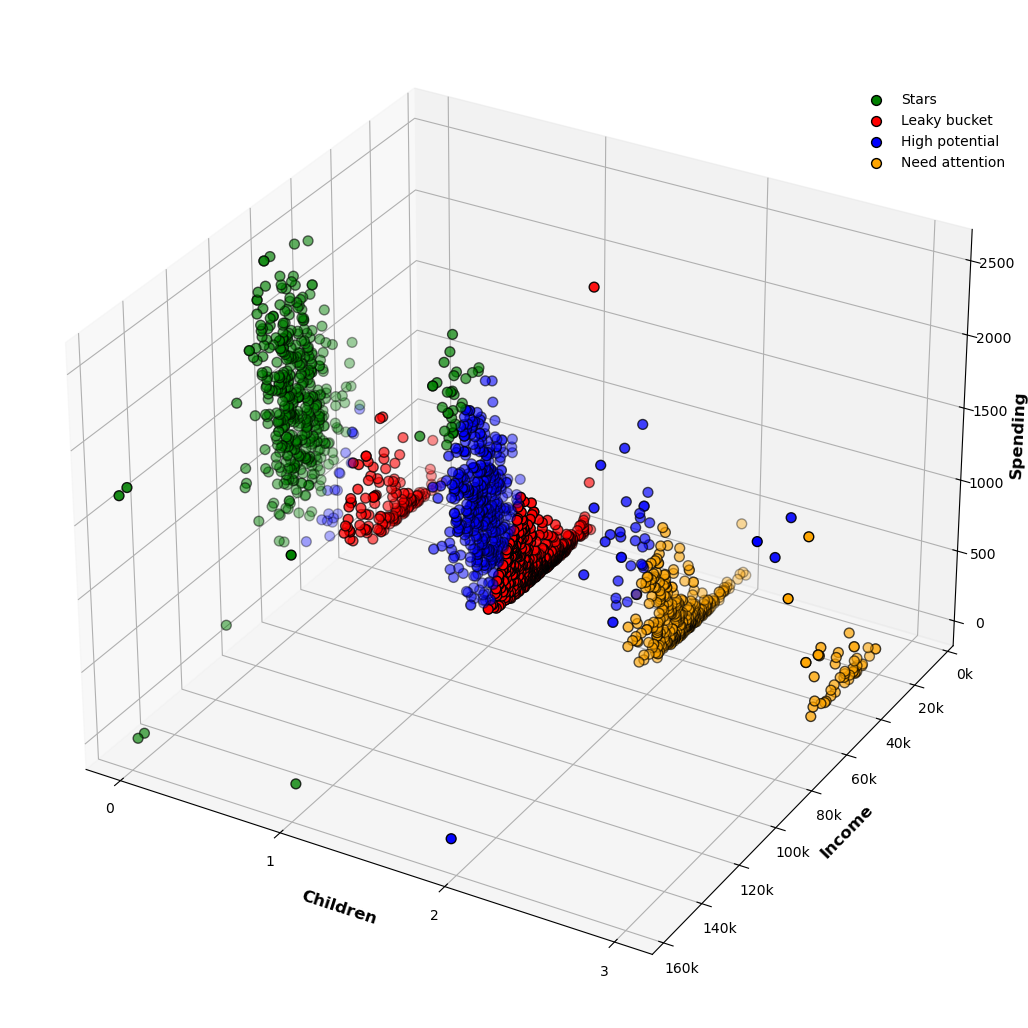

In [44]:
# Define the variables for the 3D clusters plot
data = {'Income': df['Income'],
        'Children': df['Children'],
        'Spending': df['Spending'],
        'Cluster': df['Cluster']}
df_plot = pd.DataFrame(data)

# Define custom colors for the clusters
cluster_colors = {
    'Stars': 'green',
    'Leaky bucket': 'red',
    'High potential': 'blue',
    'Need attention': 'orange'
}

# Create the 3D scatter plot
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

# Loop over each unique cluster
for cluster, color in cluster_colors.items():
    subset = df_plot[df_plot['Cluster'] == cluster]
    ax.scatter(subset['Children'], subset['Income'], subset['Spending'], 
               s=50, color=color, label=cluster, edgecolors='k')

# Set axis labels and tick parameters
ax.set_xlabel('Children', color='black', fontsize=12, fontweight='bold')
ax.set_ylabel('Income', color='black', fontsize=12, fontweight='bold')
ax.set_zlabel('Spending', color='black', fontsize=12, fontweight='bold')

# Set the tick labels for Children axis 
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['0', '1', '2', '3'])

# Display the Income units in thousands
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Set custom y-ticks to include 0
y_ticks = [0] + list(range(20000, int(df['Income'].max()) + 1, 20000))
ax.set_yticks(y_ticks)

# Reverse the Income axis by setting the limits in reverse order
ax.set_ylim(df['Income'].max(), 0)

# Add legend at the upper right corner
ax.legend()

# Position legend closer to the top left of the plot
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.93), frameon=False)

# Use tight layout to minimize truncation issues
plt.tight_layout()
fig.subplots_adjust(left=0.14, right=0.86, bottom=0.1, top=0.9)

# Show the plot
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2212 non-null   int64  
 5   Teenhome             2212 non-null   int64  
 6   Recency              2212 non-null   int64  
 7   Wines                2212 non-null   int64  
 8   Fruits               2212 non-null   int64  
 9   Meat                 2212 non-null   int64  
 10  Fish                 2212 non-null   int64  
 11  Sweets               2212 non-null   int64  
 12  Gold                 2212 non-null   int64  
 13  NumDealsPurchases    2212 non-null   int64  
 14  NumWebPurchases      2212 non-null   int64  
 15  NumCatalogPurchases  2212 non-null   int64 

In [46]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Tenure,Age,Spending,TotalNumPurchases,AcceptedCmps,Children,Has_Child,Cluster
0,5524,Graduate,Alone,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,724,57,1617,25,1,0,No_Child,Stars
1,2174,Graduate,Alone,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,174,60,27,6,0,2,Has_Child,Need attention
2,4141,Graduate,Has_Partner,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,373,49,776,21,0,0,No_Child,Stars
3,6182,Graduate,Has_Partner,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,200,30,53,8,0,1,Has_Child,Leaky bucket
4,5324,Postgraduate,Has_Partner,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,222,33,422,19,0,1,Has_Child,High potential
